# Project - Bank Term Deposit Projection

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Dataset:

In [2]:
df = pd.read_csv('project_dataset.csv', converters={'age':int})

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## Data Exploration

In [5]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

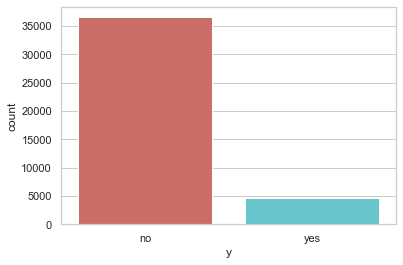

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x='y', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

Key Observations:
- the average age of customers who bought term deposits is higher than those who didn't
- pdays is lower for customers who bought term deposits (lower = more recent = better sale chance)
- campaigns are lower for customers who bough term deposits

## Data Cleaning & Data Visualization with Y

In [7]:
df = df.dropna()

In [8]:
#delete duplicate rows
df.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

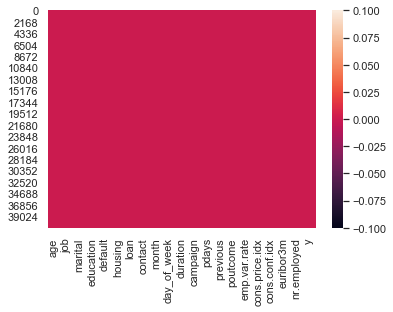

In [9]:
sns.heatmap(df.isnull())

### Age

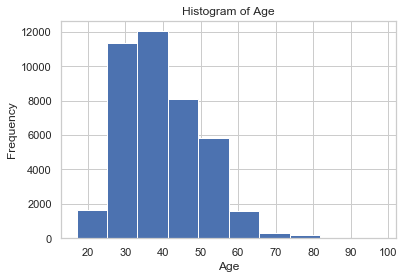

In [10]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_hist')

Most frequent age in dataset ranges from 30-40

### Job

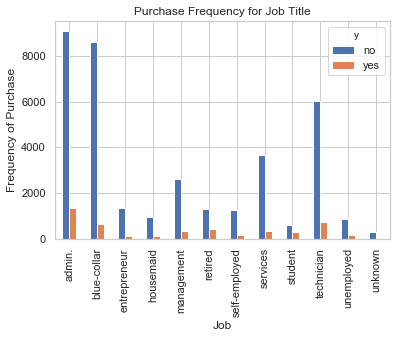

In [11]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

Y seems to be very dependent on job, so occupation is good predictor for outcome

### Marital

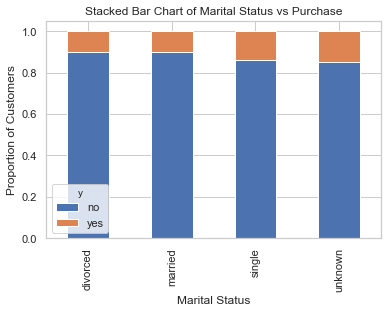

In [12]:
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('marital_vs_y_stack')

Marital status seems to have low effect on y

### Education

In [13]:
#consolidating all basic education into 'Basic'
df['education']=np.where(df['education'] =='basic.9y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.6y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='basic.4y', 'Basic', df['education'])
df['education']=np.where(df['education'] =='university.degree', 'University Degree', df['education'])
df['education']=np.where(df['education'] =='professional.course', 'Professional Course', df['education'])
df['education']=np.where(df['education'] =='high.school', 'High School', df['education'])
df['education']=np.where(df['education'] =='illiterate', 'Illiterate', df['education'])
df['education']=np.where(df['education'] =='unknown', 'Unknown', df['education'])

In [14]:
df['education'].value_counts()

Basic                  12513
University Degree      12168
High School             9515
Professional Course     5243
Unknown                 1731
Illiterate                18
Name: education, dtype: int64

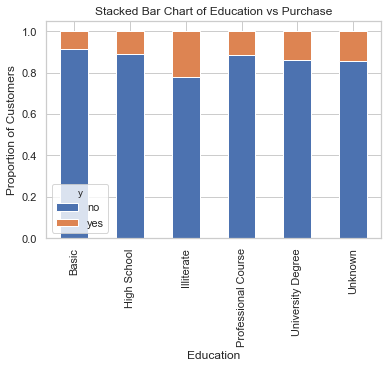

In [15]:
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_y_stack')

Education seems to have high effect on y

### Default

### Housing

In [16]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

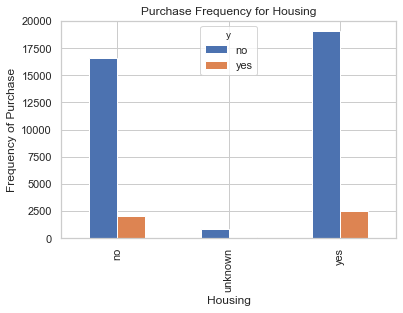

In [17]:
pd.crosstab(df.housing,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Housing')
plt.xlabel('Housing')
plt.ylabel('Frequency of Purchase')
plt.savefig('housing_vs_y_bar')

Housing doesn't seem to effect y much

### Loan

In [18]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

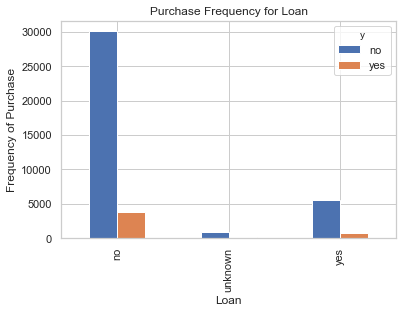

In [19]:
pd.crosstab(df.loan,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Loan')
plt.xlabel('Loan')
plt.ylabel('Frequency of Purchase')
plt.savefig('loan_vs_y_bar')

Loan doesn't seem to have much effect on y

### Contact

In [20]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

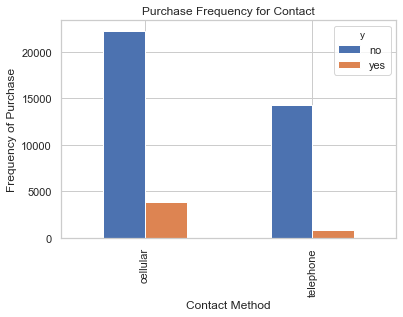

In [21]:
pd.crosstab(df.contact,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Contact')
plt.xlabel('Contact Method')
plt.ylabel('Frequency of Purchase')
plt.savefig('contact_vs_y_bar')

Method of contact seems to have little effect on y

### Month

In [22]:
df.month.str.capitalize()

0        May
1        May
2        May
3        May
4        May
        ... 
41183    Nov
41184    Nov
41185    Nov
41186    Nov
41187    Nov
Name: month, Length: 41188, dtype: object

In [23]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

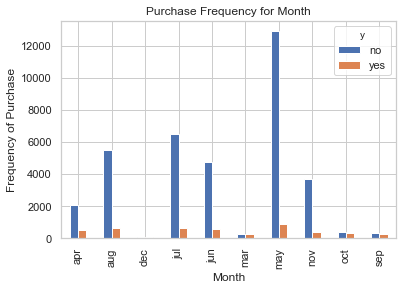

In [24]:
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('month_vs_y_bar')

Month may have an effect on y, since December, March, October, and September seem similar in outcome

### Day of Week

In [25]:
df.day_of_week.str.capitalize()

0        Mon
1        Mon
2        Mon
3        Mon
4        Mon
        ... 
41183    Fri
41184    Fri
41185    Fri
41186    Fri
41187    Fri
Name: day_of_week, Length: 41188, dtype: object

In [26]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

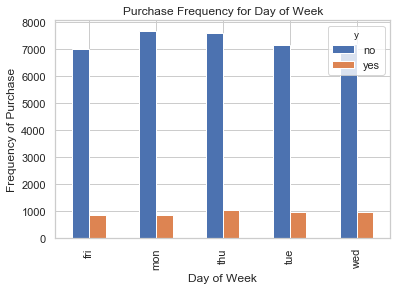

In [27]:
pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('dow_vs_y_bar')

Day of Week has little effect on y

### Campaign

In [28]:
df['campaign'] = df['campaign'].astype(int)

In [29]:
df['campaign']

0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    2
41186    1
41187    3
Name: campaign, Length: 41188, dtype: int64

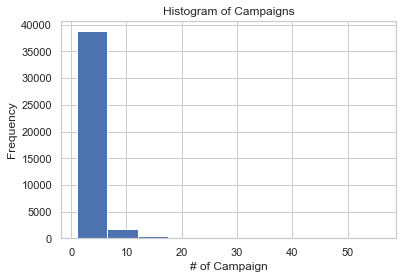

In [30]:
df.campaign.hist()
plt.title('Histogram of Campaigns')
plt.xlabel('# of Campaign')
plt.ylabel('Frequency')
plt.savefig('campaign_hist')

### Previous Outcome

In [31]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

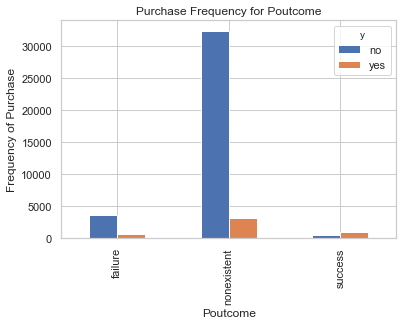

In [32]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('poutcome_vs_y_bar')

poutcome has some effect on y

### Social and Economic Context Attributes

In [33]:
#shorten decimals
df.round({'cons.price.idx': 2, 'cons.conf.idx':2, 'euribor3m':2})

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
1,57,services,married,High School,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
2,37,services,married,High School,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
4,56,services,married,High School,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.99,-36.4,4.86,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,Professional Course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes
41184,46,blue-collar,married,Professional Course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no
41185,56,retired,married,University Degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,no
41186,44,technician,married,Professional Course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.77,-50.8,1.03,4963.6,yes


In [34]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [49]:
X = df[['age', 'duration', 'campaign', 'pdays','previous','emp.var.rate','cons.price.idx', 'cons.conf.idx',
         'euribor3m','nr.employed']]
X_dummies = pd.get_dummies(df[['job', 'marital','education','default','housing','loan','contact', 'month',
                                'day_of_week','poutcome',]])
Y = pd.get_dummies(df[['y']])
X = pd.concat([X,X_dummies], axis=1)
X.head()
Y.head()

,y_no,y_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [50]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size=0.30, random_state=100)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection, tree
from scipy import stats
from scipy import stats, special

#Decision Tree
model_dt_1 = DecisionTreeClassifier(criterion = 'gini', splitter='best')
model_dt_1.fit(X_train,Y_train[['y_yes']])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
model_dt_1.score(X_train,Y_train[['y_yes']])

1.0

In [53]:
model_dt_1.score(X_test,Y_test[['y_yes']])

0.8879177793962936

In [54]:
#logistic regression model and model score
model_lr_1 = linear_model.LogisticRegression(solver='liblinear')
model_lr_1.fit(X_train,Y_train[['y_yes']])
model_lr_1.score(X_test,Y_test[['y_yes']])

/Users/Eileen/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9105770008901837

In [56]:
model_lr_1.coef_

array([[ 5.84797603e-03,  4.47818799e-03, -2.77094964e-02,
        -1.64318917e-03, -1.39842449e-01, -2.63531424e-01,
         3.42906420e-01,  3.12375677e-02, -1.66145085e-01,
        -6.38604541e-03,  6.09203338e-02, -1.55450930e-01,
        -5.07139409e-02,  8.10389800e-03, -2.66406877e-02,
         9.29919836e-02, -2.03263990e-03, -3.07162823e-02,
         7.46221823e-02,  1.69436033e-02,  1.08314243e-02,
         4.09859808e-03, -1.95422818e-02, -7.75529806e-02,
         9.88482615e-02,  1.20454382e-03, -1.24016634e-01,
        -3.86915498e-02,  1.52334376e-03,  2.79889109e-02,
         9.64247427e-02,  3.97287292e-02,  1.41399546e-01,
        -1.38373073e-01, -6.89298581e-05, -3.45884222e-03,
        -3.88061426e-03,  1.02969994e-02,  1.50514596e-02,
        -3.88061426e-03, -8.21330236e-03,  1.48480689e-01,
        -1.45523146e-01,  2.74255700e-02,  9.00086362e-02,
         2.69991675e-03,  1.16663795e-01,  1.35504018e-01,
         1.91698327e-01, -5.28265591e-01, -4.22972841e-0

In [61]:
#logistic regression 
coefficient = model_lr_1.coef_[0]
for a,b in zip(X_train,coefficient):
    print (a,b)

age 0.0058479760283504925
duration 0.004478187989529557
campaign -0.027709496446792544
pdays -0.001643189174056035
previous -0.13984244909533208
emp.var.rate -0.2635314241913876
cons.price.idx 0.3429064201061944
cons.conf.idx 0.031237567675257507
euribor3m -0.1661450848457484
nr.employed -0.006386045406303347
job_admin. 0.060920333781515915
job_blue-collar -0.15545092961674714
job_entrepreneur -0.05071394087815253
job_housemaid 0.008103898000891558
job_management -0.02664068766774497
job_retired 0.09299198364409222
job_self-employed -0.0020326399021512983
job_services -0.0307162823029881
job_student 0.07462218225426959
job_technician 0.01694360327270109
job_unemployed 0.010831424277501065
job_unknown 0.004098598083782171
marital_divorced -0.01954228184024491
marital_married -0.07755298057580332
marital_single 0.09884826154015286
marital_unknown 0.0012045438228662638
education_Basic -0.12401663378712673
education_High School -0.03869154983989915
education_Illiterate 0.001523343760373315

In [64]:
df_data = df[['X_train', 'Y']]
df_data.plt.scatter("X", "Y")

plt.plot(np.arange(0,50.05), model_lr_1.predict_proba(np.arange(0,50,0.5).reshape(-1,1))[:1], color = 'red')

KeyError: "None of [Index(['X', 'Y'], dtype='object')] are in the [columns]"

In [59]:
#decision tree
imp = model_dt_1.feature_importances_

for a,b in zip(X,imp):
    print (a,b)

age 0.08628846723812751
duration 0.3372627652247945
campaign 0.03089504438338714
pdays 0.02264899876119183
previous 0.007504214568524372
emp.var.rate 0.0027867809784233133
cons.price.idx 0.006701405260881784
cons.conf.idx 0.025019206023089612
euribor3m 0.07823701021303464
nr.employed 0.16020219451595463
job_admin. 0.010194484895165298
job_blue-collar 0.006290262382026058
job_entrepreneur 0.0024848468829256577
job_housemaid 0.003139681344254704
job_management 0.0069257541373524455
job_retired 0.0034862389529756468
job_self-employed 0.004679408029317381
job_services 0.005386864476187088
job_student 0.0015902506903835915
job_technician 0.00958514788000551
job_unemployed 0.0053560151701290155
job_unknown 0.001399911130736146
marital_divorced 0.005307293651391973
marital_married 0.006195478679840533
marital_single 0.009602911285739403
marital_unknown 0.0007845784404396985
education_Basic 0.006639099133731746
education_High School 0.011235559989249286
education_Illiterate 0.0
education_Profe

In [60]:
# Precision and Recall
y_actual = Y_test[['y_yes']]
y_test_dt =  model_dt_1.predict(X_test)
y_test_lr = model_lr_1.predict(X_test)
y_pred = y_test_dt

from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_actual, y_pred, average='macro')

(0.7191112613410997, 0.7272373075236773, 0.7230595835389821, None)

In [45]:
from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.feature_extraction import text  # some text processing tools

In [46]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1

In [47]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [65]:
#only y values and predictor x-variables
df_final=df[to_keep]
df_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [66]:
X = df_final.loc[:, df_final.columns != 'y']
y = df_final.loc[:, df_final.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51158
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


In [68]:
df_final_vars=df_final.columns.values.tolist()
y=['y']
X=[i for i in df_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/Users/Eileen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Eileen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

/Users/Eileen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Eileen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

/Users/Eileen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/Eileen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[38 39 34 40 33 28 29 37 31 36 10  4  6 12  9 15  7  5 14  8 13 11  1  1
  1  1  1  1 41  1  1  1  3  2 42  1  1  1  1  1  1 19 18 24 21 32 22 25
 35 23 20 27 26  1  1  1  1  1 17 16 30]
